<a href="https://colab.research.google.com/github/ragalaa/Directory/blob/master/Regression_with_Multivariate_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
admission_data = pd.read_csv('GRe_score.csv')
admission_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
X = admission_data.drop('Chance of Admit ', axis =1)
y = admission_data['Chance of Admit ']

y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

# 80 % data to traing and 20 % to test the data size

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
x_train.shape, x_test.shape

((320, 8), (80, 8))

In [11]:
y_train.shape, y_test.shape

((320,), (80,))

In [13]:
x_trainwith_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_trainwith_intercept)
fit_model = stats_model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     163.7
Date:                Fri, 27 Sep 2019   Prob (F-statistic):          1.17e-106
Time:                        20:56:48   Log-Likelihood:                 439.36
No. Observations:                 320   AIC:                            -860.7
Df Residuals:                     311   BIC:                            -826.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2502      0.13

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
y_pred_train = linear_model.predict(x_train)

In [16]:
from sklearn.metrics import r2_score
r2_score(y_pred_train,y_train)

0.7624837723135147

In [17]:
y_pred_test = linear_model.predict(x_test)
r2_score(y_pred_test, y_test)

0.8187452637161245

In [20]:
from scipy import stats
slope, intercept, r_value, _, _ = \
stats.linregress(admission_data['GRE Score'],admission_data['Chance of Admit '])
print('R-squarevalue', r_value**2)

R-squarevalue 0.6441835498438327


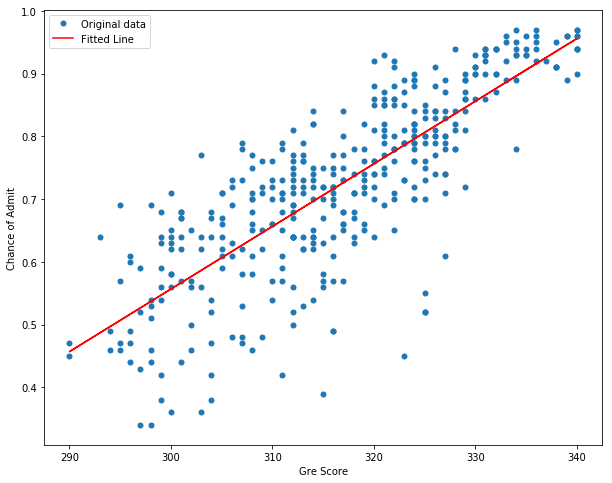

In [22]:
plt.figure(figsize=(10,8))
plt.plot(admission_data['GRE Score'],admission_data['Chance of Admit '],
        'o', label = 'Original data', markersize=5)
plt.plot(admission_data['GRE Score'], slope*admission_data['GRE Score'] + intercept, 
        'r', label = 'Fitted Line')
plt.xlabel('Gre Score')
plt.ylabel('Chance of Admit')
plt.legend()
plt.show()